In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,f1_score,classification_report
from sklearn.model_selection import KFold,cross_val_score

In [2]:
train_data = pd.read_csv(r"C:\Users\Prabhjyot Kaur\Downloads\Case Study\train.csv")
test_data = pd.read_csv(r"C:\Users\Prabhjyot Kaur\Downloads\Case Study\test.csv")

In [3]:
test_data.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...    4            0      16               9          0   
1     1  ...   41          256    1681               9          0   
2     1  ...   41          289    1681               9          0   
3     0  ...   59          256    3481               1        256   
4     0  ...   18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25           0.25     272.25     16  
1             1             2.25           0.25     272.25   1681  
2             1             2.25           0.25     272.25   1681  
3             0             1.00           0.00     256.00   3481  
4             1             0.25          64.00        NaN    324  

[5 rows x 142 columns]

In [4]:
test_data.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...    4            0      16               9          0   
1     1  ...   41          256    1681               9          0   
2     1  ...   41          289    1681               9          0   
3     0  ...   59          256    3481               1        256   
4     0  ...   18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25           0.25     272.25     16  
1             1             2.25           0.25     272.25   1681  
2             1             2.25           0.25     272.25   1681  
3             0             1.00           0.00     256.00   3481  
4             1             0.25          64.00        NaN    324  

[5 rows x 142 columns]

### Data understanding

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
#type of data.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
train_data.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo       

In [8]:
train_data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

In [9]:
 list(train_data.columns.values)

['Id',
 'v2a1',
 'hacdor',
 'rooms',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil

In [10]:
# we can see the datatypes in the train data are int64, float64 and object

# finding missing values in each datatype
na_counts = train_data.select_dtypes('int64').isnull().sum()
na_counts[na_counts > 0]

Series([], dtype: int64)

In [11]:
na_counts = train_data.select_dtypes('object').isnull().sum()
na_counts[na_counts > 0]

Series([], dtype: int64)

In [12]:
na_counts = train_data.select_dtypes('float64').isna().sum()
na_counts[na_counts>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [13]:
# we have 5 columns of float64 datatype with missing/null values

## Data Cleaning

In [14]:
# Fixing columns with mixed values
# We can correct the variables using a mapping and convert to floats
# “yes” = 1 and “no” = 0

In [15]:
mapping={'yes':1,'no':0}

for df in [train_data, test_data]:
    df['dependency'] =df['dependency'].replace(mapping)
    df['dependency'] = pd.to_numeric(df['dependency'])

    df['edjefe'] =df['edjefe'].replace(mapping)
    df['edjefe'] = pd.to_numeric(df['edjefe'])

    df['edjefa'] =df['edjefa'].replace(mapping)
    df['edjefa'] = pd.to_numeric(df['edjefa'])

In [16]:
train_data.head(5)

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [17]:
# According to the documentation for these columns with missing values:

#v2a1 (total nulls: 6860) : Monthly rent payment
#v18q1 (total nulls: 7342) : number of tablets household owns
#rez_esc (total nulls: 7928) : Years behind in school
#meaneduc (total nulls: 5) : average years of education for adults (18+)
#SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

# 

In [18]:
# handling missing values for column "v2a1" with highest number of missing values

In [19]:
# Columns related to  Monthly rent payment :

# tipovivi1, =1 own and fully paid house
# tipovivi2, "=1 own,  paying in installments"
# tipovivi3, =1 rented
# tipovivi4, =1 precarious 
# tipovivi5, "=1 other(assigned,  borrowed)"

In [20]:
data = train_data[train_data['v2a1'].isnull()].head() 

In [21]:
columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
2           1          0          0          0          0
13          1          0          0          0          0
14          1          0          0          0          0
26          1          0          0          0          0
32          1          0          0          0          0

In [22]:
# Variables indicating home ownership
own_variables = [x for x in train_data if x.startswith('tipo')]

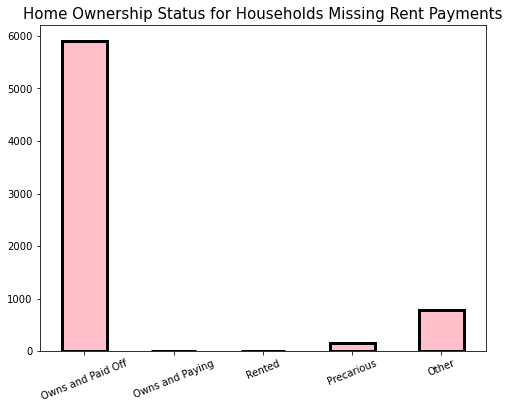

In [23]:
# Visualisation of the home ownership variables for home missing rent payments
train_data.loc[train_data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (8, 6),color = 'pink',edgecolor = 'k', linewidth = 3);

plt.xticks([0, 1, 2, 3, 4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 22)

plt.title('Home Ownership Status for Households Missing Rent Payments', size = 15);

In [24]:
#Looking at the above data we can assume that when the house is fully paid, there will be no monthly rent payment
#Adding for all the null values.
for df in [train_data, test_data]:
    df['v2a1'].fillna(value=0, inplace=True)

In [25]:
train_data[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

# 

In [26]:
# handling missing values for column "v18q1 "
# v18q1 (total nulls: 7342) : number of tablets household owns
# Columns related to "v18q1" = "v18q"

In [27]:
# heads of households
head = train_data.loc[train_data['parentesco1'] == 1].copy()
head.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

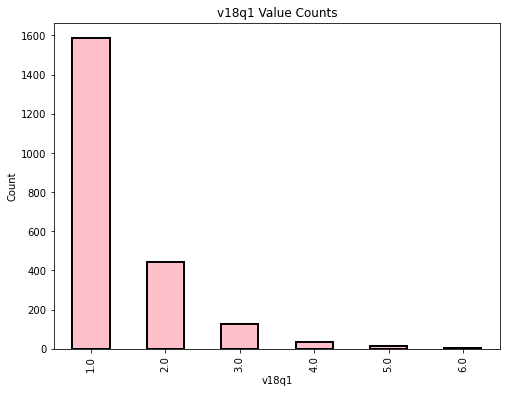

In [28]:
# visualising "v18q1" column
plt.figure(figsize = (8, 6))
col='v18q1'
train_data[col].value_counts().sort_index().plot.bar(color = 'pink',edgecolor = 'k', linewidth = 2)
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
plt.show();

In [29]:
# adding 0 for all the null values
for df in [train_data, test_data]:
    df['v18q1'].fillna(value=0, inplace=True)

In [30]:
train_data[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

# 

In [31]:
# handling missing values for "rez_esc" column
# rez_esc (total nulls: 7928) : Years behind in school

In [32]:
for df in [train_data, test_data]:
    df['rez_esc'].fillna(value=0, inplace=True)

In [33]:
train_data[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

# 

In [34]:
# handling missing values for "meaneduc" column
# meaneduc (total nulls: 5) : average years of education for adults (18+)

# Columns related to average years of education for adults (18+):
# 1. edjefe
# 2. edjefa
# 3. instlevel1
# 4. instlevel2

In [35]:
data = train_data[train_data['meaneduc'].isnull()].head()

In [36]:
columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

edjefe  edjefa  instlevel1  instlevel2
count     0.0     0.0         0.0         0.0
mean      NaN     NaN         NaN         NaN
std       NaN     NaN         NaN         NaN
min       NaN     NaN         NaN         NaN
25%       NaN     NaN         NaN         NaN
50%       NaN     NaN         NaN         NaN
75%       NaN     NaN         NaN         NaN
max       NaN     NaN         NaN         NaN

In [37]:
#from the above data we find that meaneduc is null when no level of education is 0
for df in [train_data, test_data]:
    df['meaneduc'].fillna(value=0, inplace=True)

In [38]:
train_data[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

# 

In [39]:
# handling missing values for "SQBmeaned" column
# SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

# Columns related to "SQBmeaned" :
# 1.edjefe
# 2.edjefa
# 3.instlevel1
# 4.instlevel2

In [40]:
data = train_data[train_data['SQBmeaned'].isnull()].head()

In [41]:
columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

edjefe  edjefa  instlevel1  instlevel2
count     0.0     0.0         0.0         0.0
mean      NaN     NaN         NaN         NaN
std       NaN     NaN         NaN         NaN
min       NaN     NaN         NaN         NaN
25%       NaN     NaN         NaN         NaN
50%       NaN     NaN         NaN         NaN
75%       NaN     NaN         NaN         NaN
max       NaN     NaN         NaN         NaN

In [42]:
#from the above data we can see that SQBmeaned is null when no level of education is 0
for df in [train_data, test_data]:
    df['SQBmeaned'].fillna(value=0, inplace=True)

In [43]:
train_data[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

### 

### Checking if there are any biases in our dataset

In [44]:
# test 1
contingency_tab=pd.crosstab(train_data['tipovivi3'],train_data['v2a1'])
Observed_Values=contingency_tab.values
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

print('Significance level: ',alpha)

print('Degree of Freedom: ',df)

print('chi-square statistic:',chi_square_statistic)

print('critical_value:',critical_value)

print('p-value:',p_value)

print('\n')
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 1542.6427745783096
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1542.6427745783096
critical_value: 3.841458820694124
p-value: 0.0


Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


### Check if there is a house without a family head.

In [45]:
train_data["parentesco1"].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [46]:
pd.crosstab(train_data['edjefa'],train_data['edjefe'])

edjefe   0    1    2    3    4    5     6    7    8    9   ...   12   13   14  \
edjefa                                                     ...                  
0       435  123  194  307  137  222  1845  234  257  486  ...  113  103  208   
1        69    0    0    0    0    0     0    0    0    0  ...    0    0    0   
2        84    0    0    0    0    0     0    0    0    0  ...    0    0    0   
3       152    0    0    0    0    0     0    0    0    0  ...    0    0    0   
4       136    0    0    0    0    0     0    0    0    0  ...    0    0    0   
5       176    0    0    0    0    0     0    0    0    0  ...    0    0    0   
6       947    0    0    0    0    0     0    0    0    0  ...    0    0    0   
7       179    0    0    0    0    0     0    0    0    0  ...    0    0    0   
8       217    0    0    0    0    0     0    0    0    0  ...    0    0    0   
9       237    0    0    0    0    0     0    0    0    0  ...    0    0    0   
10       96    0    0    0    0    0     0    0    0    0  ...    0    0    0   
11      399    0    0    0    0    0     0    0    0    0  ...    0    0    0   
12       72    0    0    0    0    0     0    0    0    0  ...    0    0    0   
13       52    0    0    0    0    0     0    0    0    0  ...    0    0    0   
14      120    0    0    0    0    0     0    0    0    0  ...    0    0    0   
15      188    0    0    0    0    0     0    0    0    0  ...    0    0    0   
16      113    0    0    0    0    0     0    0    0    0  ...    0    0    0   
17       76    0    0    0    0    0     0    0    0    0  ...    0    0    0   
18        3    0    0    0    0    0     0    0    0    0  ...    0    0    0   
19        4    0    0    0    0    0     0    0    0    0  ...    0    0    0   
20        2    0    0    0    0    0     0    0    0    0  ...    0    0    0   
21        5    0    0    0    0    0     0    0    0    0  ...    0    0    0   

edjefe   15   16   17  18  19  20  21  
edjefa                                 
0       285  134  202  19  14   7  43  
1         0    0    0   0   0   0   0  
2         0    0    0   0   0   0   0  
3         0    0    0   0   0   0   0  
4         0    0    0   0   0   0   0  
5         0    0    0   0   0   0   0  
6         0    0    0   0   0   0   0  
7         0    0    0   0   0   0   0  
8         0    0    0   0   0   0   0  
9         0    0    0   0   0   0   0  
10        0    0    0   0   0   0   0  
11        0    0    0   0   0   0   0  
12        0    0    0   0   0   0   0  
13        0    0    0   0   0   0   0  
14        0    0    0   0   0   0   0  
15        0    0    0   0   0   0   0  
16        0    0    0   0   0   0   0  
17        0    0    0   0   0   0   0  
18        0    0    0   0   0   0   0  
19        0    0    0   0   0   0   0  
20        0    0    0   0   0   0   0  
21        0    0    0   0   0   0   0  

[22 rows x 22 columns]

In [47]:
# Interpretation : Above cross tab shows 0 male head and 0 female head which implies that there 
# are 435 families with no family head.

### Set poverty level of the members and the head of the house within a family
 

In [48]:
Poverty_level = train_data[train_data['v2a1'] !=0]
Poverty_level.shape

(2668, 143)

In [49]:
p_level = Poverty_level.groupby('area1')['v2a1'].apply(np.median)
p_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [50]:
def poverty(x):
    if x<8000:
        return('Below poverty level')
    elif x>140000:
        return('Above poverty level')
    elif x<140000:
        return('Below poverty level: Urban ; Above poverty level : Rural ')


### Checking whether all members of the house have the same poverty level

In [51]:
tab = Poverty_level['v2a1'].apply(poverty)

In [52]:
pd.crosstab(tab ,Poverty_level['area1'])

area1                                                 0     1
v2a1                                                         
Above poverty level                                 139  1103
Below poverty level: Urban ; Above poverty leve...  306  1081

In [53]:
# Interpretation :

#There are total 1242 people above poverty level independent of area
#Remaining 1111 people level depends on their area

### Count how many null values are existing in columns

In [54]:
train_data.isna().sum().value_counts()

0    143
dtype: int64

In [55]:
train_data['Target'].isna().sum()

0

In [56]:
# conclusion - There are zero null values in the Target variable and the columns

### Predict the accuracy using random forest classifier

In [57]:
# delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [train_data, test_data]:
    df.drop(columns = cols,inplace=True)

In [58]:
train_data.head(5)

v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  \
0  190000.0       0      3       0     1       1     0    0.0     0     1   
1  135000.0       0      4       0     1       1     1    1.0     0     1   
2       0.0       0      8       0     1       1     0    0.0     0     0   
3  180000.0       0      5       0     1       1     1    1.0     0     2   
4  180000.0       0      5       0     1       1     1    1.0     0     2   

   ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0  ...          100    1849               1        100             0   
1  ...          144    4489               1        144             0   
2  ...          121    8464               1          0             0   
3  ...           81     289              16        121             4   
4  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 141 columns]

In [59]:
train_data.iloc[:,0:-1]

v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  \
0      190000.0       0      3       0     1       1     0    0.0     0     1   
1      135000.0       0      4       0     1       1     1    1.0     0     1   
2           0.0       0      8       0     1       1     0    0.0     0     0   
3      180000.0       0      5       0     1       1     1    1.0     0     2   
4      180000.0       0      5       0     1       1     1    1.0     0     2   
5      180000.0       0      5       0     1       1     1    1.0     0     2   
6      180000.0       0      5       0     1       1     1    1.0     0     2   
7      130000.0       1      2       0     1       1     0    0.0     0     1   
8      130000.0       1      2       0     1       1     0    0.0     0     1   
9      130000.0       1      2       0     1       1     0    0.0     0     1   
10     130000.0       1      2       0     1       1     0    0.0     0     1   
11     100000.0       0      3       0     1       1     0    0.0     0     0   
12     100000.0       0      3       0     1       1     0    0.0     0     0   
13          0.0       0      4       0     1       1     1    1.0     0     1   
14          0.0       0      4       0     1       1     1    1.0     0     1   
15      90000.0       1      2       0     1       1     0    0.0     0     2   
16      90000.0       1      2       0     1       1     0    0.0     0     2   
17      90000.0       1      2       0     1       1     0    0.0     0     2   
18      90000.0       1      2       0     1       1     0    0.0     0     2   
19     215000.0       0      4       0     1       1     0    0.0     0     1   
20     215000.0       0      4       0     1       1     0    0.0     0     1   
21     150000.0       0      3       0     1       1     0    0.0     0     1   
22     150000.0       0      3       0     1       1     0    0.0     0     1   
23     100000.0       1      1       1     0       1     0    0.0     0     2   
24     100000.0       1      1       1     0       1     0    0.0     0     2   
25     100000.0       1      1       1     0       1     0    0.0     0     2   
26          0.0       0      5       0     1       1     0    0.0     0     1   
27     120000.0       0      4       0     1       1     1    1.0     0     2   
28     120000.0       0      4       0     1       1     1    1.0     0     2   
29     120000.0       0      4       0     1       1     1    1.0     0     2   
30     100000.0       0      5       0     1       1     0    0.0     0     1   
31     100000.0       0      5       0     1       1     0    0.0     0     1   
32          0.0       0      5       0     1       1     0    0.0     0     4   
33          0.0       0      5       0     1       1     0    0.0     0     4   
34          0.0       0      5       0     1       1     0    0.0     0     4   
35          0.0       0      5       0     1       1     0    0.0     0     4   
36          0.0       0      5       0     1       1     0    0.0     0     4   
37      80000.0       0      4       0     1       1     0    0.0     0     2   
38      80000.0       0      4       0     1       1     0    0.0     0     2   
39      80000.0       0      4       0     1       1     0    0.0     0     2   
40      90000.0       0      5       0     1       1     1    1.0     0     1   
41      90000.0       0      5       0     1       1     1    1.0     0     1   
42          0.0       0      8       0     1       1     1    1.0     0     2   
43          0.0       0      8       0     1       1     1    1.0     0     2   
44          0.0       0      8       0     1       1     1    1.0     0     2   
45          0.0       0      4       0     1       1     0    0.0     0     1   
46          0.0       0      4       0     1       1     0    0.0     0     1   
47          0.0       0      5       0     1       1     1    1.0     0     1   
48          0.0       0      5       0    

In [60]:
train_data.iloc[:,-1]

0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
30      4
31      4
32      4
33      4
34      4
35      4
36      4
37      4
38      4
39      4
40      4
41      4
42      4
43      4
44      4
45      4
46      4
47      4
48      4
49      4
50      2
51      2
52      2
53      2
54      4
55      4
56      4
57      4
58      2
59      4
60      4
61      4
62      4
63      4
64      2
65      4
66      4
67      4
68      4
69      4
70      4
71      4
72      4
73      4
74      4
75      4
76      4
77      4
78      4
79      4
80      4
81      4
82      4
83      4
84      4
85      4
86      4
87      4
88      4
89      4
90      4
91      4
92      4
93      4
94      4
95      4
96      4
97      4
98      4
99      4


In [61]:
x_features = train_data.iloc[:,0:-1] # feature without target
y_features = train_data.iloc[:,-1] # only target
print("x_features: ", x_features.shape)
print("y_features: ", y_features.shape)

x_features:  (9557, 140)
y_features:  (9557,)


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_features,test_size=0.2,random_state=1)
rmclassifier = RandomForestClassifier()

In [63]:
rmclassifier.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_predict = rmclassifier.predict(x_test)

In [65]:
print(accuracy_score(y_test,y_predict))

0.9236401673640168


In [66]:
print(confusion_matrix(y_test,y_predict))

[[ 112   10    0   25]
 [   6  283    7   37]
 [   0    9  174   46]
 [   0    3    3 1197]]


In [67]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.95      0.76      0.85       147
           2       0.93      0.85      0.89       333
           3       0.95      0.76      0.84       229
           4       0.92      1.00      0.95      1203

    accuracy                           0.92      1912
   macro avg       0.93      0.84      0.88      1912
weighted avg       0.92      0.92      0.92      1912



In [68]:
y_predict_test = rmclassifier.predict(test_data)

In [69]:
y_predict_test

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

### Check the accuracy using random forest with cross validation. ¶

In [70]:
seed = 7
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)

In [71]:
rmclassifier = RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))

[0.91841004 0.92939331 0.92150706 0.9126112  0.91993721]


In [72]:
results = cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

92.03717631243033


In [73]:
num_trees= 100

rmclassifier = RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))

[0.91841004 0.92939331 0.92150706 0.9126112  0.91993721]


In [74]:

results = cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

92.03717631243033


In [75]:
rmclassifier.fit(x_features,y_features)
labels = list(x_features)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rmclassifier.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

feature  importance
0     v2a1    0.015478
2    rooms    0.020329
9     r4h2    0.015449
13    r4m3    0.015235
15    r4t2    0.015272

In [76]:
y_predict_test = rmclassifier.predict(test_data)
y_predict_test

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

Text(0.5, 0, 'Importance')

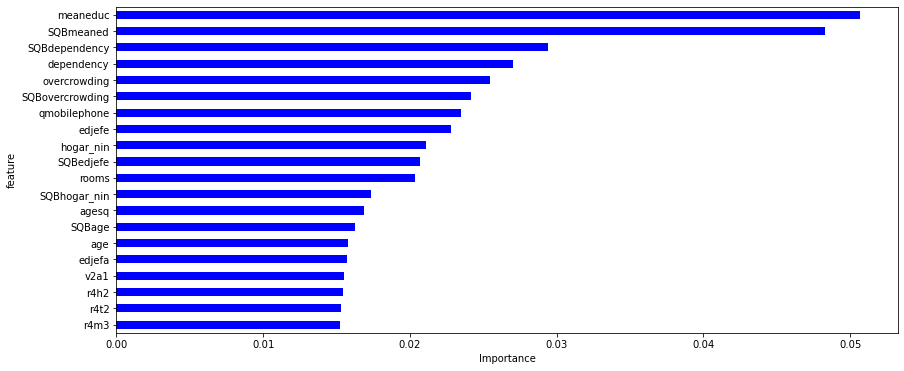

In [77]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(14, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [78]:
# From the above figure, meaneduc,dependency,overcrowding has significant influence on the model.